In [15]:
# %%
%matplotlib widget
import spikeinterface.extractors as se
from spikeinterface.core import get_noise_levels
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from nwb_conv.oephys import OEPhysDataFolder
from scipy import signal
import ocplot as ocp

In [25]:
recording_path = Path("/Volumes/SystemsNeuroBiology/SNeuroBiology_shared/P02_MPAOPTO_LP/e05_doubleservoarm-ephys-pagfiber/v02_ganesha/M31-npx")

In [26]:
rec_folder = OEPhysDataFolder(recording_path)
# print(rec_folder.reference_stream_name)
# probe_name
# probe_stream_name = [stream for stream in rec_folder.stream_names if probe_name in stream][0]
print(rec_folder.stream_names)

['Record Node 107#Neuropix-PXI-100.ProbeA', 'Record Node 107#Neuropix-PXI-100.ProbeB-AP', 'Record Node 107#Neuropix-PXI-100.ProbeB-LFP', 'Record Node 107#NI-DAQmx-102.PXIe-6341']


In [27]:
recording = se.read_openephys(recording_path, stream_name=rec_folder.stream_names[0])

In [28]:
recording.get_duration(
)

6450.561466666667

In [33]:
n_seconds = 10
start_time = 5000
ids = [50]
start_frame = start_time * recording.get_sampling_frequency()
n_samples = n_seconds * recording.get_sampling_frequency()
trace = recording.get_traces(start_frame=start_frame, end_frame=start_frame + n_samples, 
                             channel_ids=[recording.get_channel_ids()[i] for i in ids], return_scaled=True)
# %%
trace = np.array(trace)

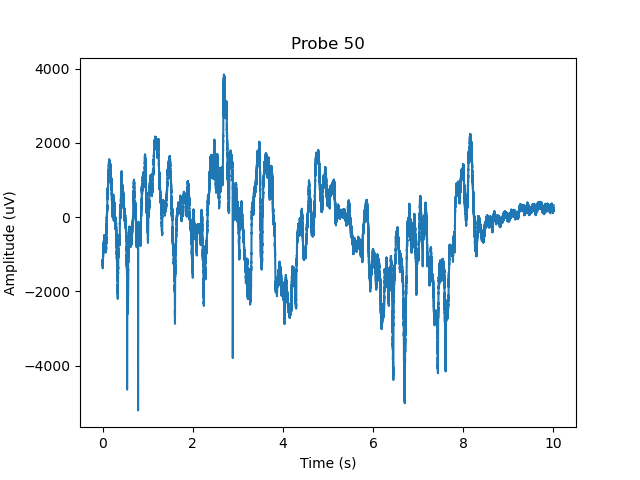

In [37]:
plt.figure()
x_axis = np.arange(trace.shape[0]) / recording.get_sampling_frequency()
plt.plot(x_axis, trace)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (uV)")
plt.title("Probe 50")
plt.show()
# %%
